In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("Set2")
%matplotlib inline

In [63]:
df = pd.read_csv("D:\project\SuperStoreOrders.csv")
print(df.head())

          order_id order_date ship_date       ship_mode    customer_name  \
0     AG-2011-2040   1/1/2011  6/1/2011  Standard Class  Toby Braunhardt   
1    IN-2011-47883   1/1/2011  8/1/2011  Standard Class      Joseph Holt   
2     HU-2011-1220   1/1/2011  5/1/2011    Second Class    Annie Thurman   
3  IT-2011-3647632   1/1/2011  5/1/2011    Second Class     Eugene Moren   
4    IN-2011-47883   1/1/2011  8/1/2011  Standard Class      Joseph Holt   

       segment            state    country  market   region  ...  \
0     Consumer      Constantine    Algeria  Africa   Africa  ...   
1     Consumer  New South Wales  Australia    APAC  Oceania  ...   
2     Consumer         Budapest    Hungary    EMEA     EMEA  ...   
3  Home Office        Stockholm     Sweden      EU    North  ...   
4     Consumer  New South Wales  Australia    APAC  Oceania  ...   

          category sub_category                 product_name sales quantity  \
0  Office Supplies      Storage          Tenex Lockers,

In [64]:
df.describe()

,quantity,discount,profit,shipping_cost,year
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,3.476545,0.142908,28.641740,26.375915,2012.777208
std,2.278766,0.212280,174.424113,57.296804,1.098931
min,1.000000,0.000000,-6599.978000,0.000000,2011.000000
25%,2.000000,0.000000,0.000000,2.610000,2012.000000
50%,3.000000,0.000000,9.240000,7.790000,2013.000000
75%,5.000000,0.200000,36.810000,24.450000,2014.000000
max,14.000000,0.850000,8399.976000,933.570000,2014.000000


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        51290 non-null  object 
 1   order_date      51290 non-null  object 
 2   ship_date       51290 non-null  object 
 3   ship_mode       51290 non-null  object 
 4   customer_name   51290 non-null  object 
 5   segment         51290 non-null  object 
 6   state           51290 non-null  object 
 7   country         51290 non-null  object 
 8   market          51290 non-null  object 
 9   region          51290 non-null  object 
 10  product_id      51290 non-null  object 
 11  category        51290 non-null  object 
 12  sub_category    51290 non-null  object 
 13  product_name    51290 non-null  object 
 14  sales           51290 non-null  object 
 15  quantity        51290 non-null  int64  
 16  discount        51290 non-null  float64
 17  profit          51290 non-null 

In [66]:
df['order_date'] = df['order_date'].astype('datetime64[ns]')
df['ship_date'] = df['ship_date'].astype('datetime64[ns]')
df['sales'] = pd.to_numeric(df['sales'], errors='coerce')

In [67]:
df.dtypes

order_id                  object
order_date        datetime64[ns]
ship_date         datetime64[ns]
ship_mode                 object
customer_name             object
segment                   object
state                     object
country                   object
market                    object
region                    object
product_id                object
category                  object
sub_category              object
product_name              object
sales                    float64
quantity                   int64
discount                 float64
profit                   float64
shipping_cost            float64
order_priority            object
year                       int64
dtype: object

In [68]:
df.isnull().sum()

order_id             0
order_date           0
ship_date            0
ship_mode            0
customer_name        0
segment              0
state                0
country              0
market               0
region               0
product_id           0
category             0
sub_category         0
product_name         0
sales             2630
quantity             0
discount             0
profit               0
shipping_cost        0
order_priority       0
year                 0
dtype: int64

In [69]:
df['sales'] = df['sales'].fillna(0)

In [70]:
df.isnull().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

In [71]:
df.nunique()

order_id          25035
order_date         1430
ship_date          1464
ship_mode             4
customer_name       795
segment               3
state              1094
country             147
market                7
region               13
product_id        10292
category              3
sub_category         17
product_name       3788
sales               993
quantity             14
discount             27
profit            24575
shipping_cost     10037
order_priority        4
year                  4
dtype: int64

In [72]:
df.describe()

,order_date,ship_date,sales,quantity,discount,profit,shipping_cost,year
count,51290,51290,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,2013-04-30 17:16:21.384285440,2013-05-05 19:10:10.504971520,152.761318,3.476545,0.142908,28.641740,26.375915,2012.777208
min,2011-01-01 00:00:00,2011-01-02 00:00:00,0.000000,1.000000,0.000000,-6599.978000,0.000000,2011.000000
25%,2012-06-06 00:00:00,2012-06-13 00:00:00,24.000000,2.000000,0.000000,0.000000,2.610000,2012.000000
50%,2013-06-26 00:00:00,2013-06-30 00:00:00,68.000000,3.000000,0.000000,9.240000,7.790000,2013.000000
75%,2014-04-30 00:00:00,2014-05-09 00:00:00,196.000000,5.000000,0.200000,36.810000,24.450000,2014.000000
max,2014-12-31 00:00:00,2015-07-01 00:00:00,999.000000,14.000000,0.850000,8399.976000,933.570000,2014.000000
std,NaN,NaN,199.062579,2.278766,0.212280,174.424113,57.296804,1.098931


In [73]:
df.describe(include='number')


,sales,quantity,discount,profit,shipping_cost,year
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,152.761318,3.476545,0.142908,28.641740,26.375915,2012.777208
std,199.062579,2.278766,0.212280,174.424113,57.296804,1.098931
min,0.000000,1.000000,0.000000,-6599.978000,0.000000,2011.000000
25%,24.000000,2.000000,0.000000,0.000000,2.610000,2012.000000
50%,68.000000,3.000000,0.000000,9.240000,7.790000,2013.000000
75%,196.000000,5.000000,0.200000,36.810000,24.450000,2014.000000
max,999.000000,14.000000,0.850000,8399.976000,933.570000,2014.000000


In [74]:
#Which segment is the best seller?
df["segment"].value_counts()

segment
Consumer       26518
Corporate      15429
Home Office     9343
Name: count, dtype: int64

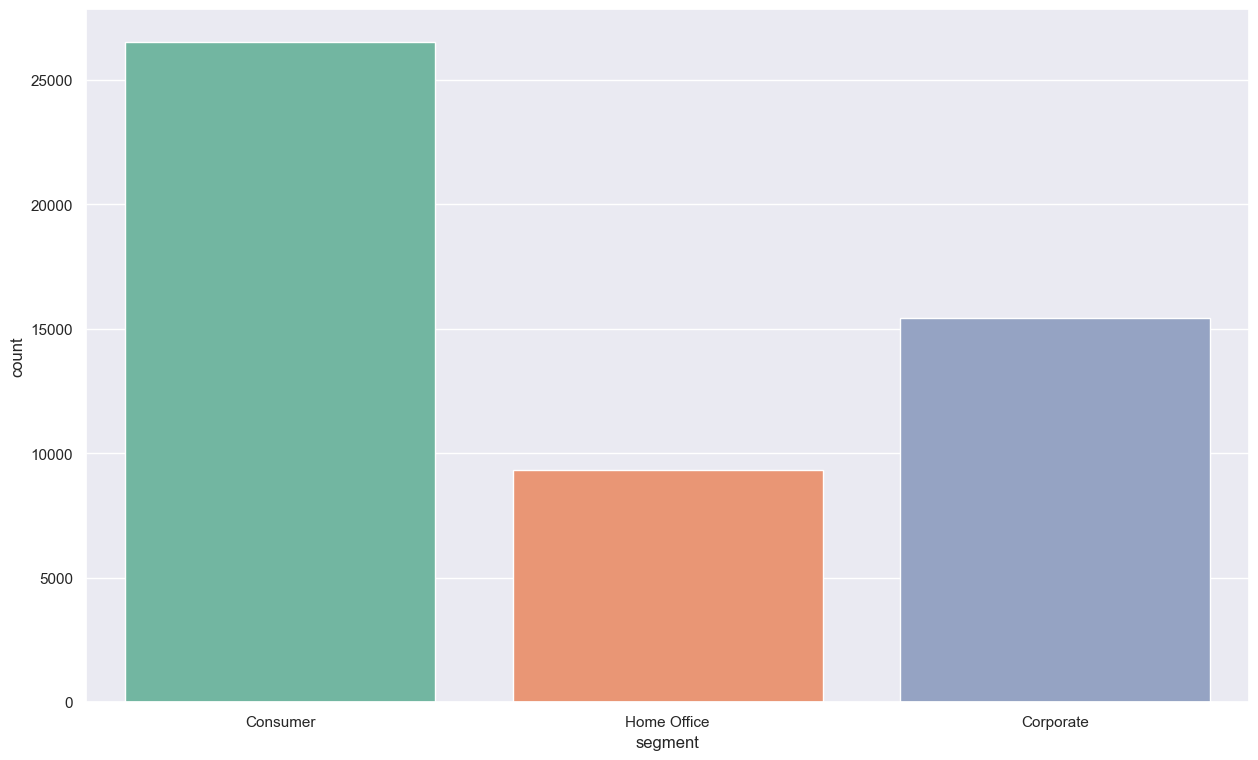

In [75]:
sns.countplot(x='segment', data=df, hue='segment', palette='Set2')
plt.legend([], [], frameon=False)  # remove legend if unwanted
plt.show()


The Consumer Segment is the best seller.

QQ  Which Region has the highest order count and In which Region do we need to grow our Business?

In [76]:
df['region'].value_counts()

region
Central           11117
South              6645
EMEA               5029
North              4785
Africa             4587
Oceania            3487
West               3203
Southeast Asia     3129
East               2848
North Asia         2338
Central Asia       2048
Caribbean          1690
Canada              384
Name: count, dtype: int64

Cental Region has the highest order count.

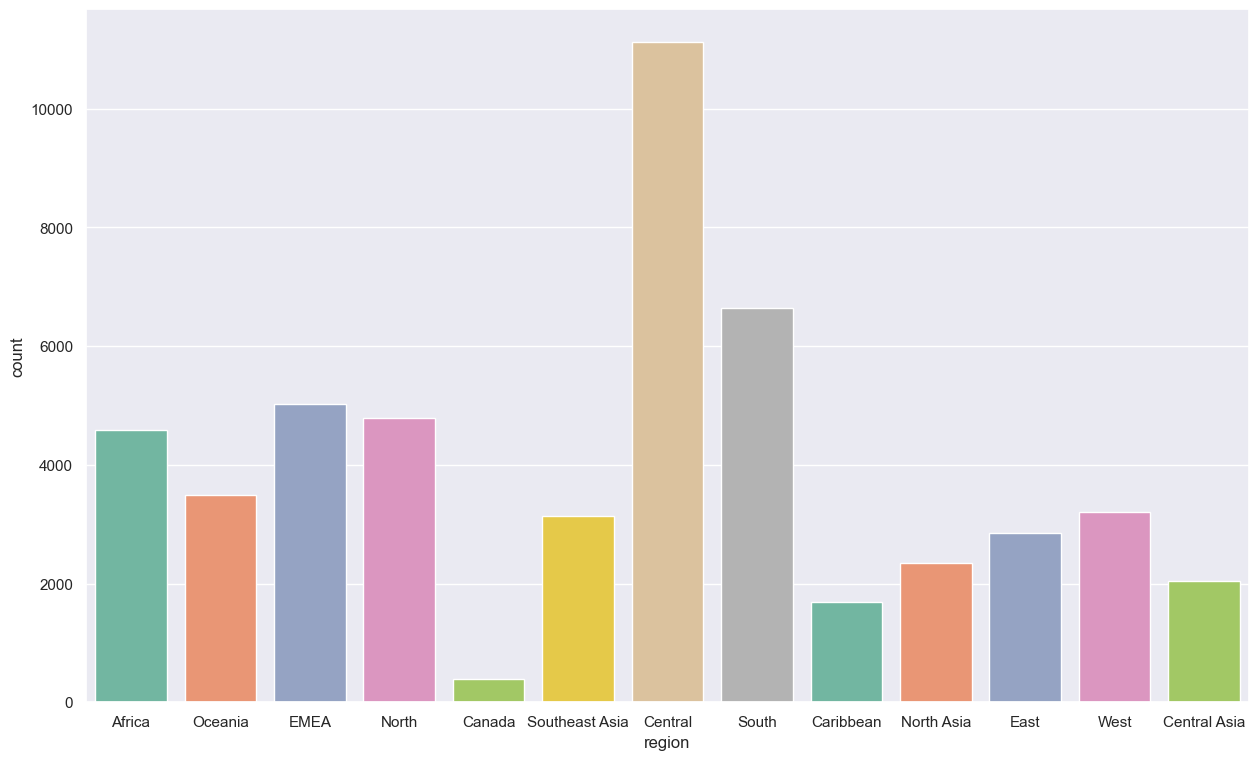

In [77]:
sns.set(rc={'figure.figsize': (15, 9)})
sns.countplot(x='region', data=df, hue='region', palette='Set2')
plt.legend([], [], frameon=False)
plt.show()

Central region performs best.
We should grow business in regions with fewer orders like Canada and Caribbean.

Q: Who are the Top 10 Customers of the SuperStore and How much is their Repartition of the Profit?

<Axes: title={'center': 'Customer Name & Product Ordered'}, ylabel='customer_name'>

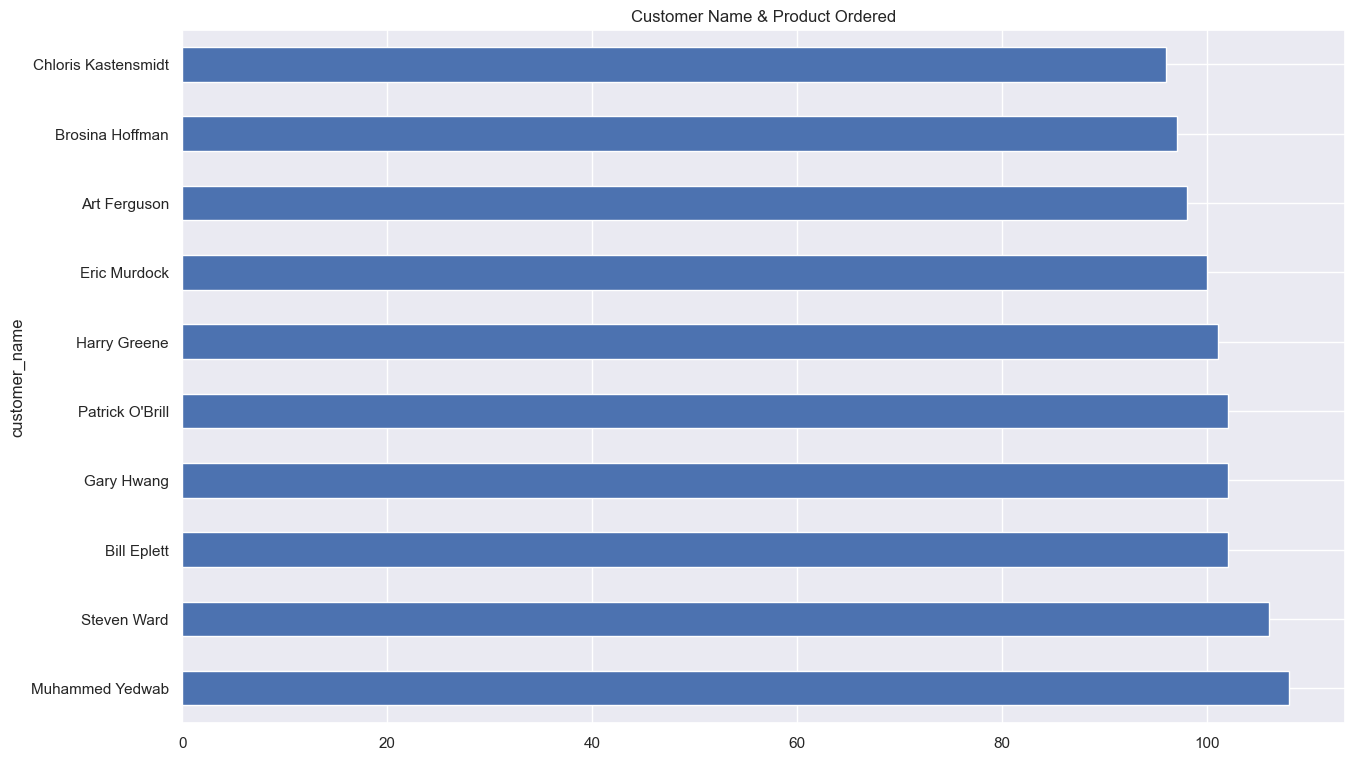

In [78]:
df['customer_name'].value_counts()[:10].plot(kind='barh',title='Customer Name & Product Ordered')

In [79]:
customers = list(df['customer_name'].value_counts()[:10].index)
filters = df['customer_name'].isin(customers)
A = df[filters]

In [80]:
colors = sns.color_palette('pastel')[0:]
values = A.groupby('customer_name')['profit'].sum()
values

customer_name
Art Ferguson           2278.30370
Bill Eplett            7410.00530
Brosina Hoffman        4876.93980
Chloris Kastensmidt     965.81294
Eric Murdock           3306.01548
Gary Hwang             3908.11510
Harry Greene           -291.49228
Muhammed Yedwab        2642.65408
Patrick O'Brill        3778.36370
Steven Ward            2794.73160
Name: profit, dtype: float64

Harry Greene is in the list of Top 10 customers but he is actually in Negative which is a loss for our superstore.

In [81]:
A = A[A['customer_name'] != 'Harry Greene']

In [82]:
del customers[-2]

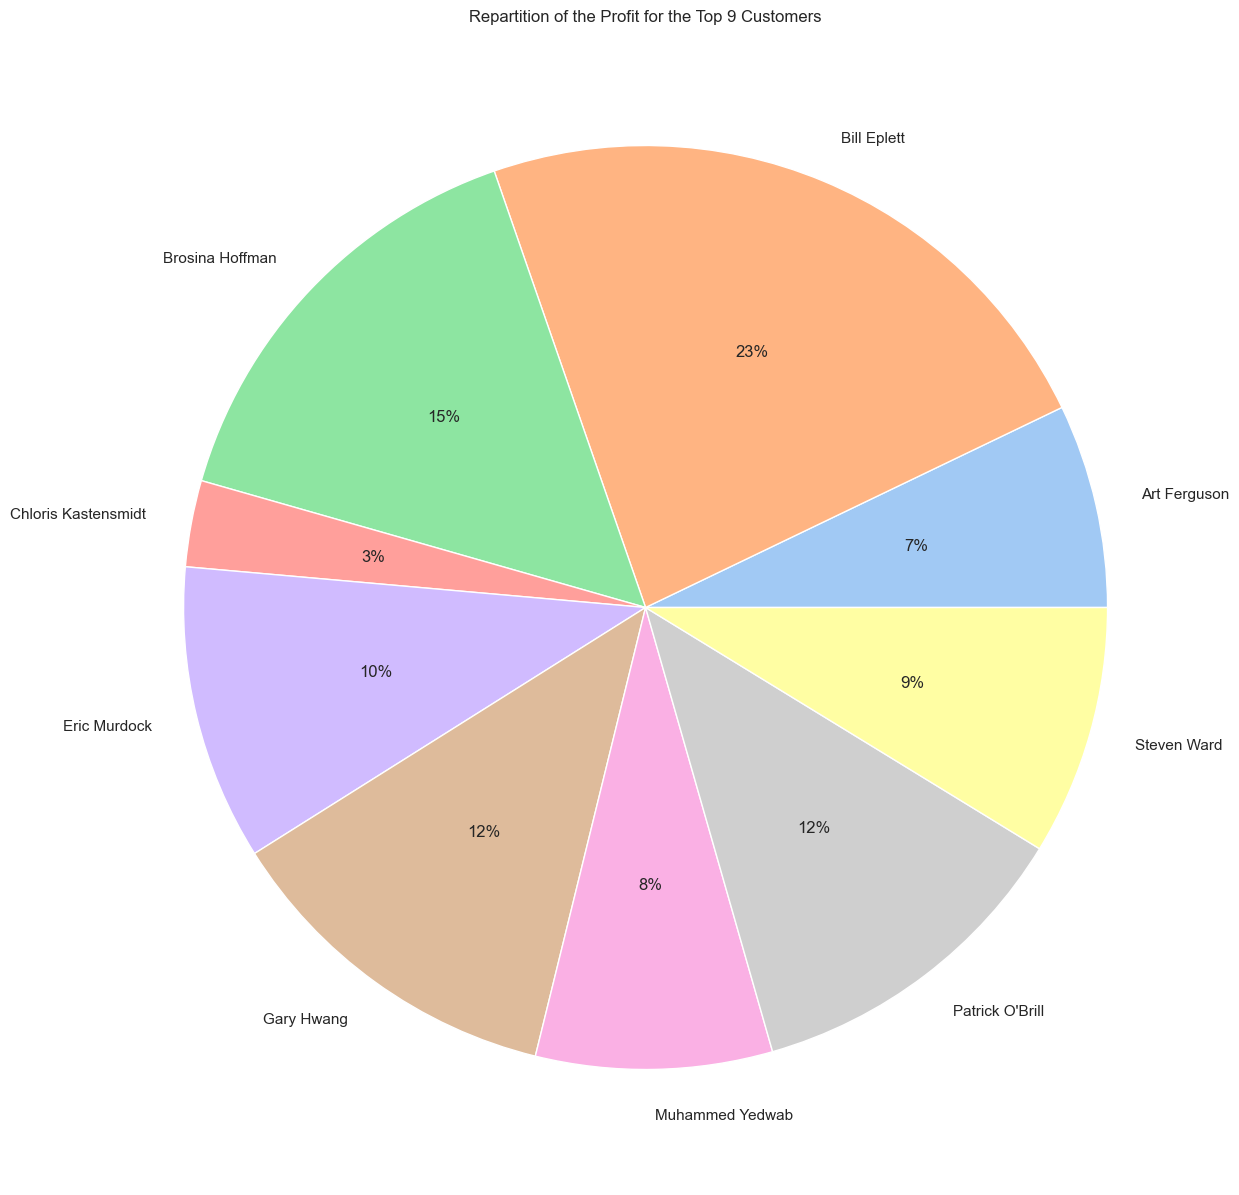

In [83]:
plt.figure(figsize=(15,15))
values = A.groupby('customer_name')['profit'].sum()
plt.pie(values, labels=values.index, colors=colors, autopct='%.0f%%')
plt.title("Repartition of the Profit for the Top 9 Customers")
plt.show()

We were able to get the insight that Bill Eplett is Best customer and is providing the superstore with Profit of 23%

Q: What are the Highest selling and Lowest Selling Sub-Category?

sub_category
Binders        6152
Storage        5059
Art            4883
Paper          3538
Chairs         3434
Phones         3357
Furnishings    3170
Accessories    3075
Labels         2606
Envelopes      2435
Supplies       2425
Fasteners      2420
Bookcases      2411
Copiers        2223
Appliances     1755
Machines       1486
Tables          861
Name: count, dtype: int64


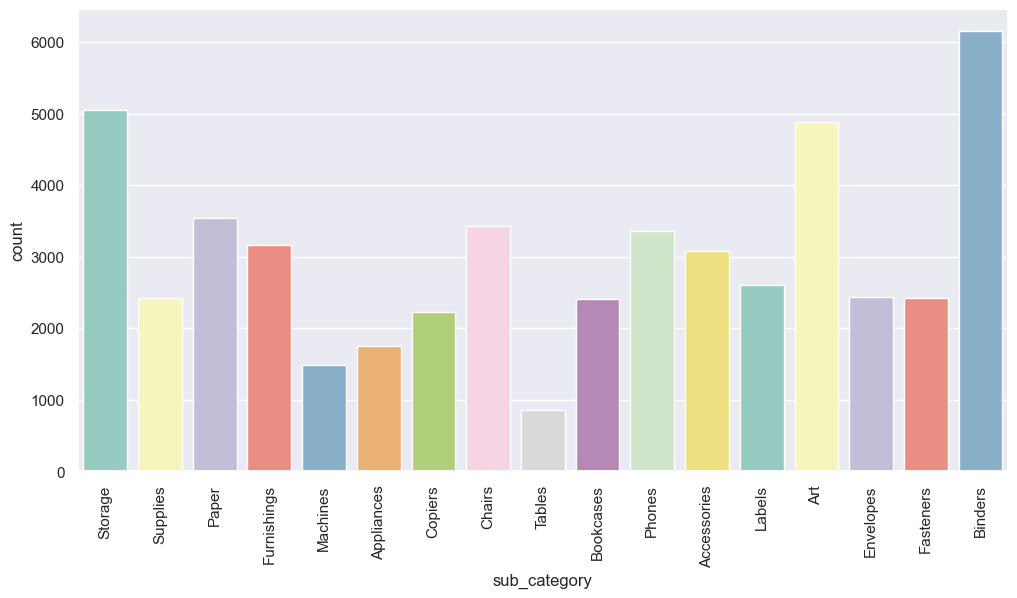

In [84]:
print(df['sub_category'].value_counts())
plt.figure(figsize=(12,6))
sns.countplot(x='sub_category',data=df,hue='sub_category',palette='Set3',legend=False)
plt.xticks(rotation=90)
plt.show()

Q(a)How much each Sub-Category is contributing in Sales of SuperStore?

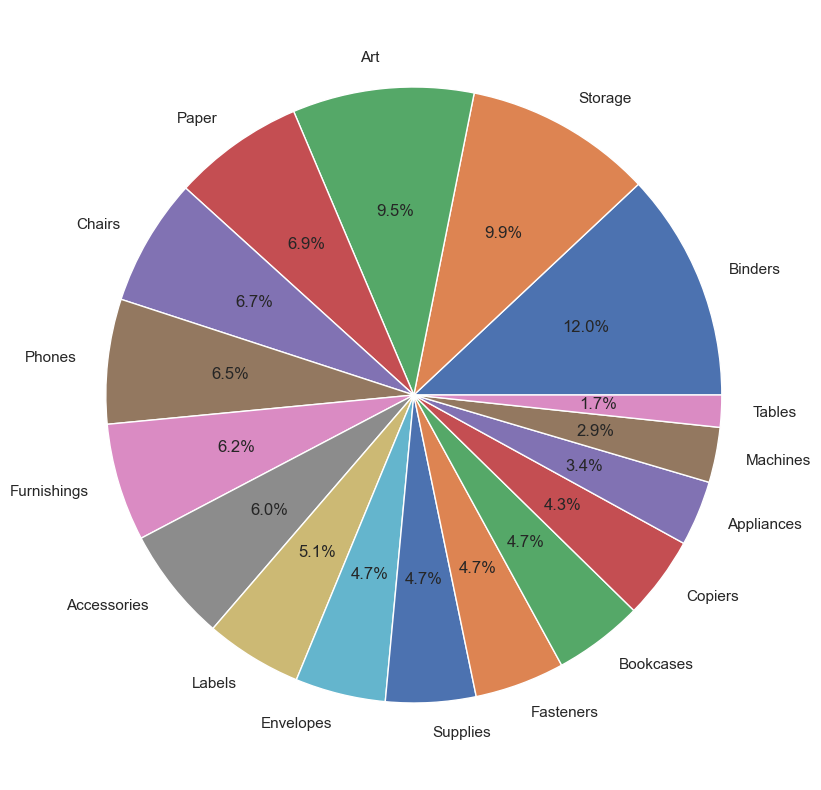

In [85]:
plt.figure(figsize=(15,10))
plt.pie(df['sub_category'].value_counts(),labels=df["sub_category"].value_counts().keys(),autopct="%0.1f%%")
plt.show()

Q: What are the Top 10 States with highest Order Count?

In [86]:
df['state'].value_counts().head(10)

state
California                2001
England                   1499
New York                  1128
Texas                      985
Ile-de-France              981
New South Wales            781
North Rhine-Westphalia     719
Queensland                 717
San Salvador               615
Pennsylvania               587
Name: count, dtype: int64

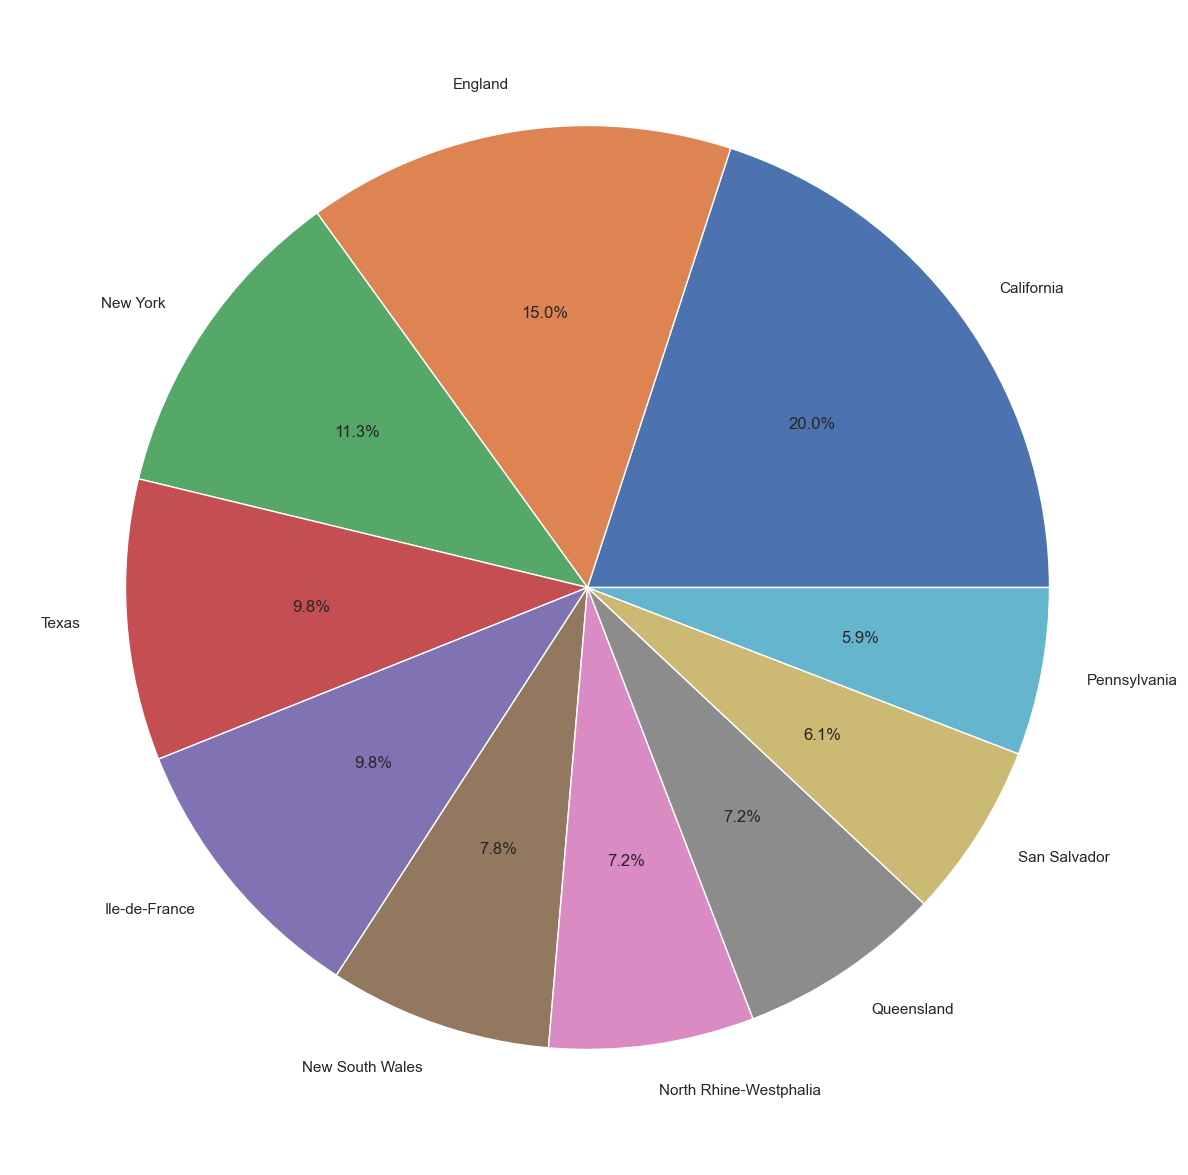

In [87]:
plt.figure(figsize=(20,15))
df['state'].value_counts().head(10).plot.pie(autopct='%1.1f%%')
plt.ylabel('')
plt.show()


Q-Analyzing the Data by Country

In [88]:
df['country'].unique()

array(['Algeria', 'Australia', 'Hungary', 'Sweden', 'Canada',
       'New Zealand', 'Iraq', 'Philippines', 'United Kingdom', 'Malaysia',
       'Guatemala', 'Iran', 'Thailand', 'Tanzania', 'Brazil', 'Mexico',
       'Cuba', 'France', 'United States', 'Japan', 'Sudan', 'Taiwan',
       'Indonesia', 'Vietnam', 'Angola', 'China', 'Mozambique', 'Lebanon',
       'Singapore', 'Netherlands', 'Nigeria', 'Egypt', 'Venezuela',
       'South Africa', 'Spain', 'India', 'Turkey', 'Austria', 'Italy',
       'Germany', 'Nicaragua', 'Dominican Republic', 'El Salvador',
       'Denmark', 'Saudi Arabia', 'Zambia', 'Myanmar (Burma)', 'Russia',
       'Mongolia', 'Belgium', 'Kenya', 'Colombia', 'Estonia',
       'Madagascar', 'Portugal', 'Morocco', 'Sierra Leone', 'Norway',
       'Central African Republic', 'Czech Republic', 'Benin',
       'Bangladesh', 'Panama', 'Chile', 'South Korea', 'Switzerland',
       'Moldova', 'Uganda', 'Zimbabwe', 'Niger', 'Senegal', 'Hong Kong',
       'Democratic Republic o

Q(a)Look for Top 10 Consumer Countries

In [89]:
df['country'].value_counts()[0:10]

country
United States     9994
Australia         2837
France            2827
Mexico            2644
Germany           2065
China             1880
United Kingdom    1633
Brazil            1599
India             1555
Indonesia         1390
Name: count, dtype: int64

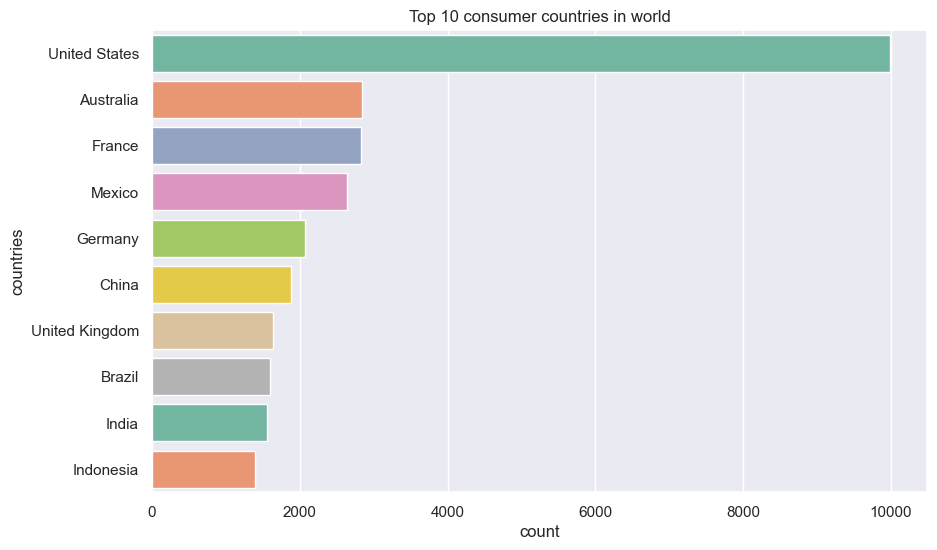

In [90]:
L1 = ["United States","Australia","France","Mexico","Germany","China","United Kingdom","Brazil","India","Indonesia"]
L2 = [9994,2837,2827,2644,2065,1880,1633,1599,1555,1390]
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10,6))
sns.barplot(x=L2, y=L1, hue=L1, palette="Set2", legend=False)
plt.title("Top 10 consumer countries in world")
plt.xlabel("count")
plt.ylabel("countries")
plt.show()

UNITED STATES IS THE LARGEST CONSUMER COUNTRY

Q(b)What are the Top 3 Consumer Countries orders as per Segment & Category?

In [91]:
# Top 3 consumer countries orders as per categories & sub-categories
df_US=df[df["country"]=="United States"]
df_Aus=df[df["country"]=="Australia"]
df_FR=df[df["country"]=="France"]

<Axes: title={'center': 'United States'}, xlabel='segment', ylabel='count'>

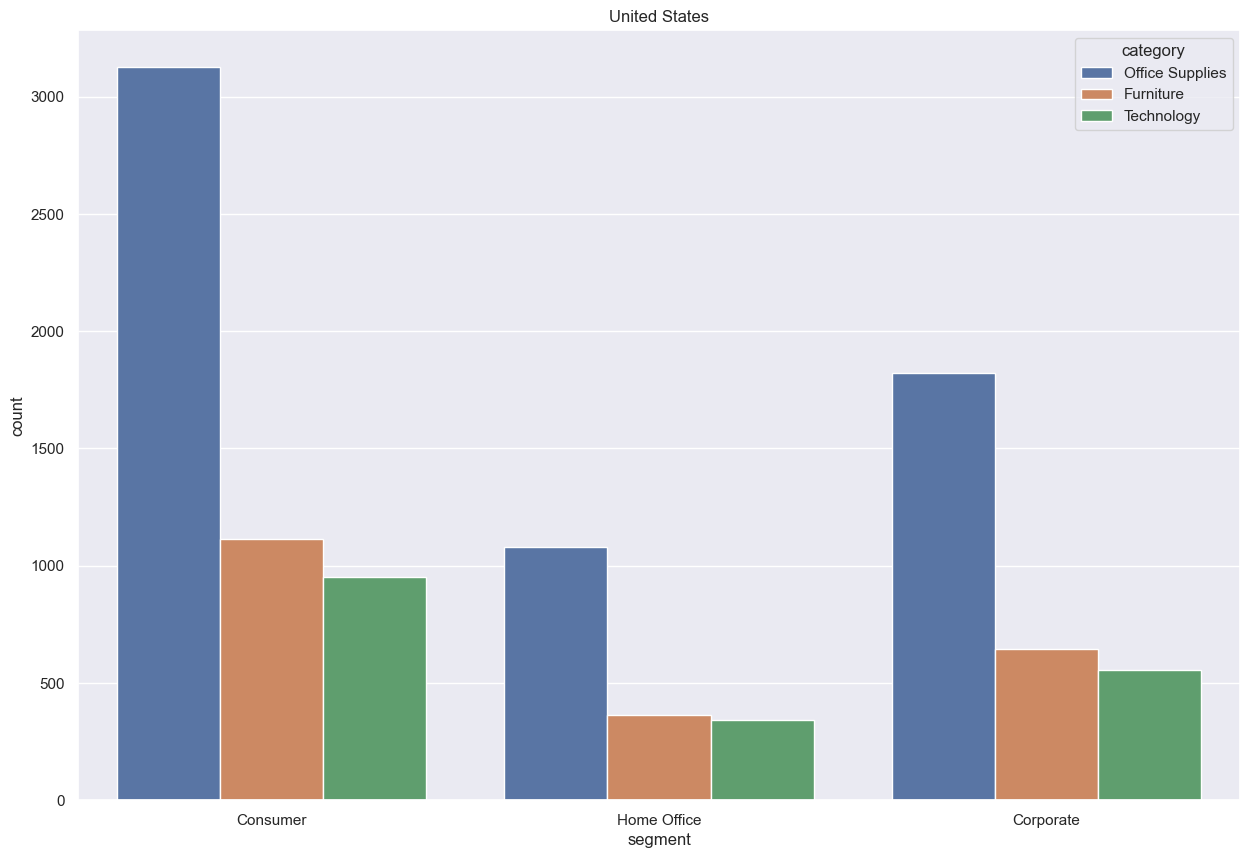

In [92]:
#1st Largest Consumer Country "United States"
plt.figure(figsize=(15,10))
plt.title("United States")
sns.set_theme(style="darkgrid")
sns.countplot(x=df_US["segment"],hue=df_US["category"])

<Axes: title={'center': 'Australia'}, xlabel='segment', ylabel='count'>

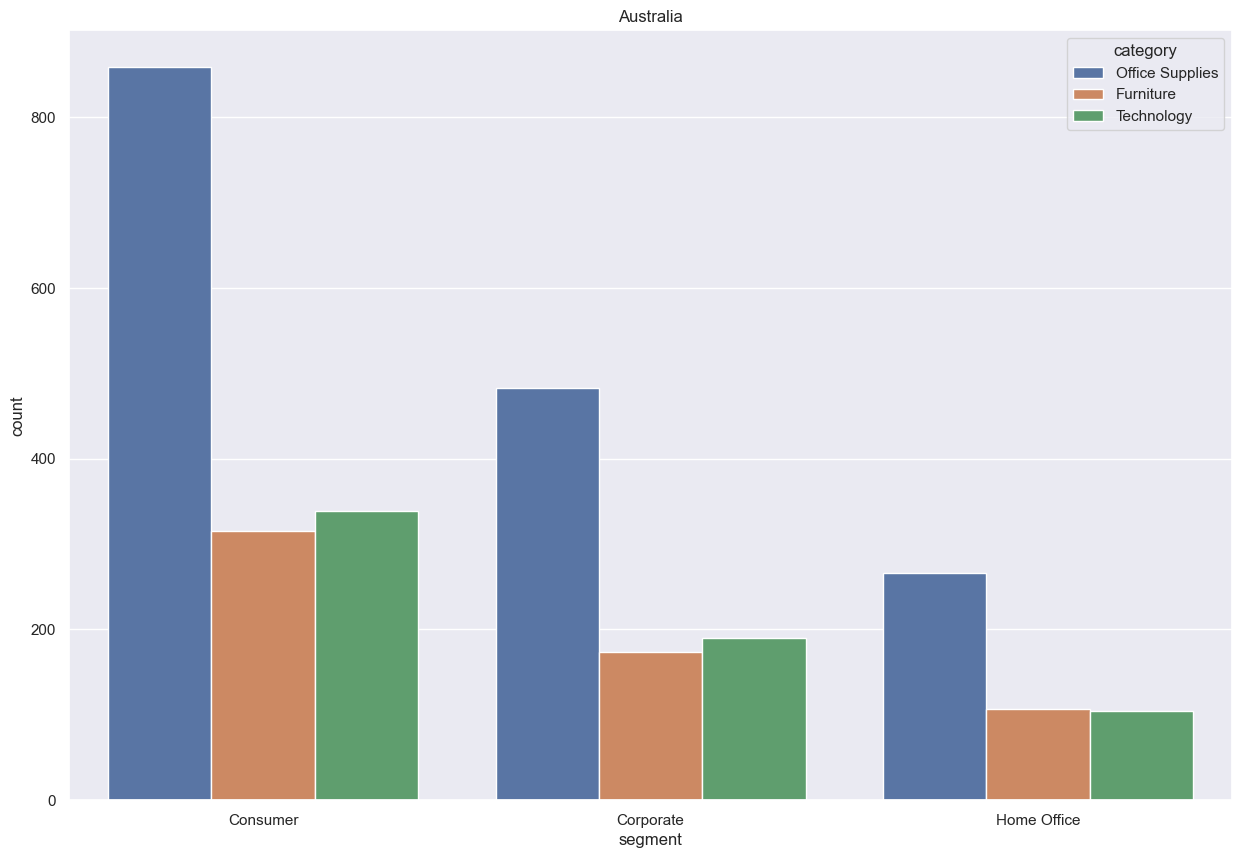

In [93]:
#2nd Largest Consumer Country "Australia"
plt.figure(figsize=(15,10))
plt.title("Australia")
sns.set_theme(style="darkgrid")
sns.countplot(x=df_Aus["segment"],hue=df_Aus["category"])

<Axes: title={'center': 'France'}, xlabel='segment', ylabel='count'>

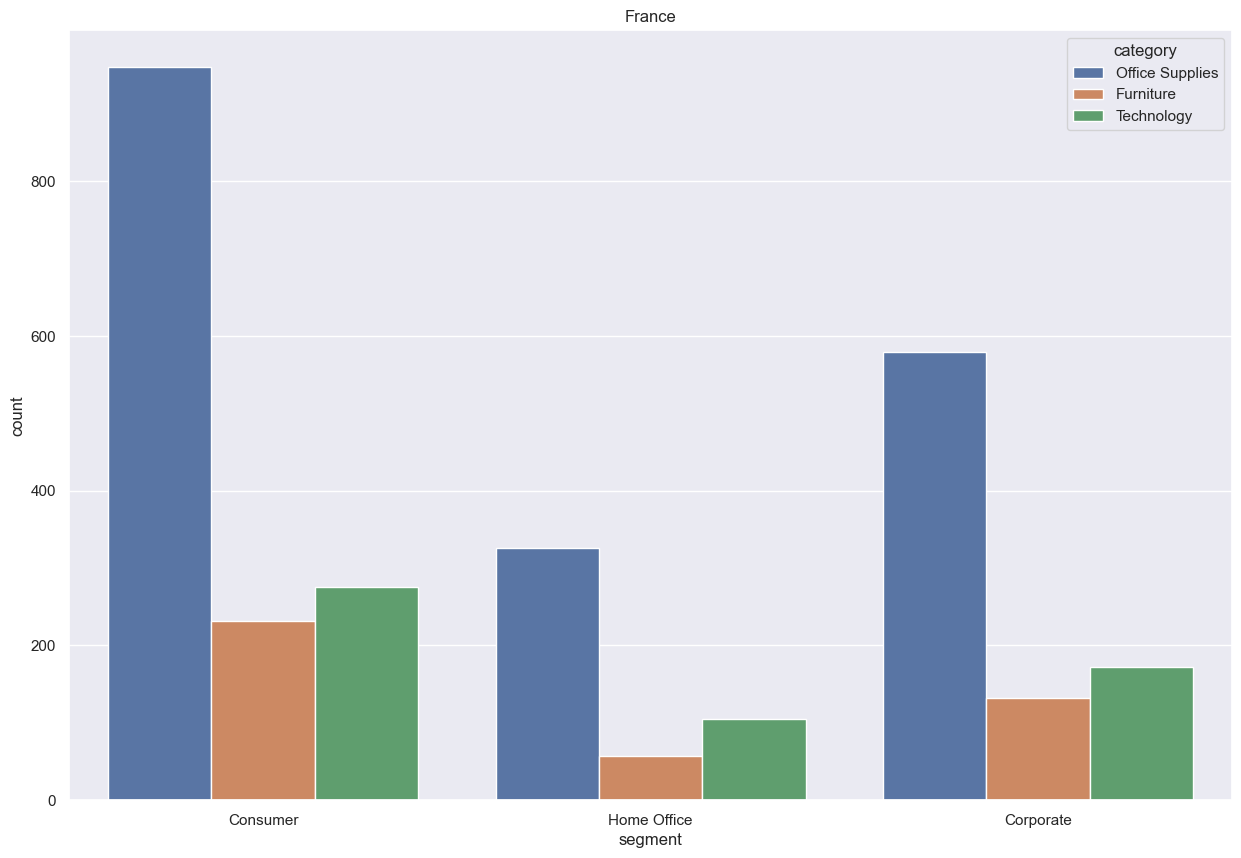

In [94]:
#3rd Largest Consumer Country "France"
plt.figure(figsize=(15,10))
plt.title("France")
sns.set_theme(style="darkgrid")
sns.countplot(x=df_FR["segment"],hue=df_FR["category"])

Q  What are the product needs of Top 3 countries as per Category & Sub-category?

<Axes: title={'center': 'United States'}, xlabel='category', ylabel='count'>

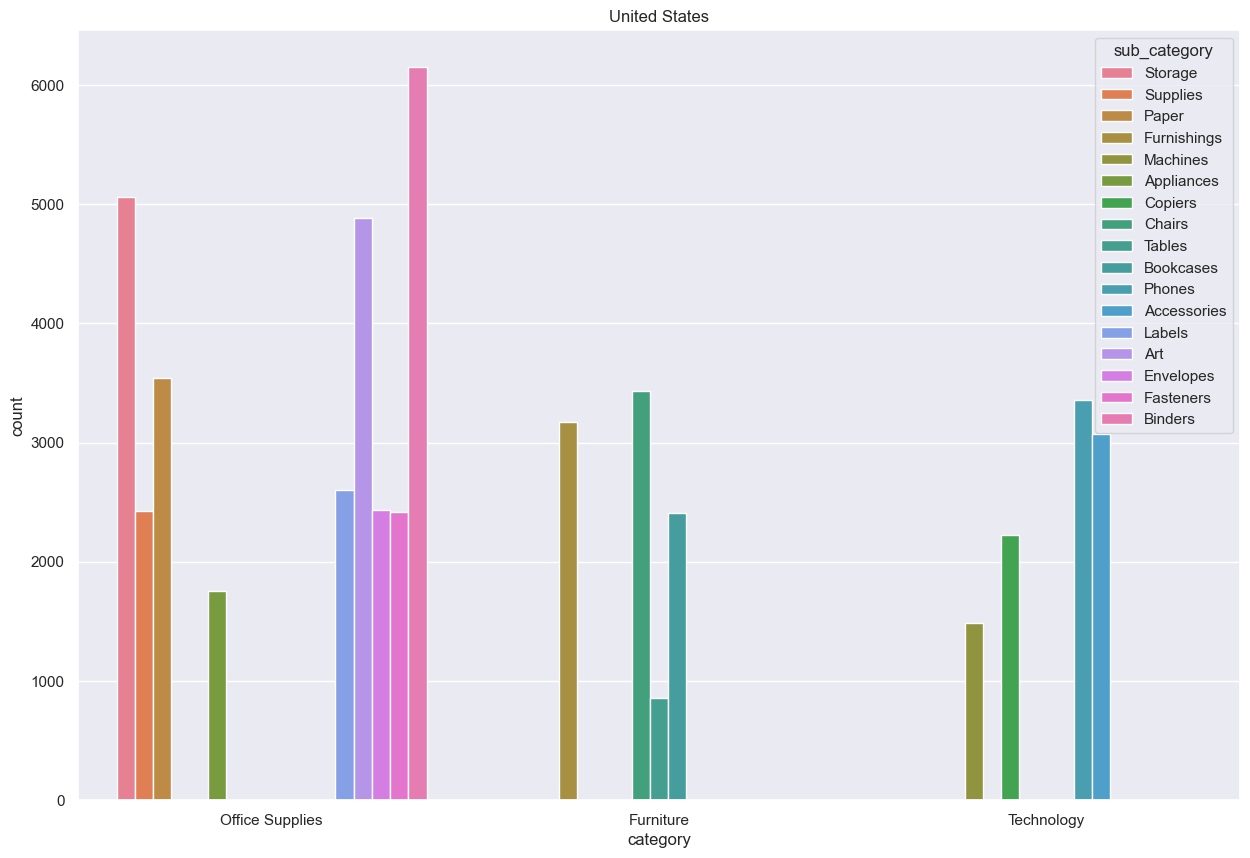

In [95]:
#1st largest consumer country "United States" 
plt.figure(figsize=(15,10))
plt.title("United States")
sns.set_theme(style="darkgrid")
sns.countplot(x=df["category"],hue=df["sub_category"])

<Axes: title={'center': 'Australia'}, xlabel='category', ylabel='count'>

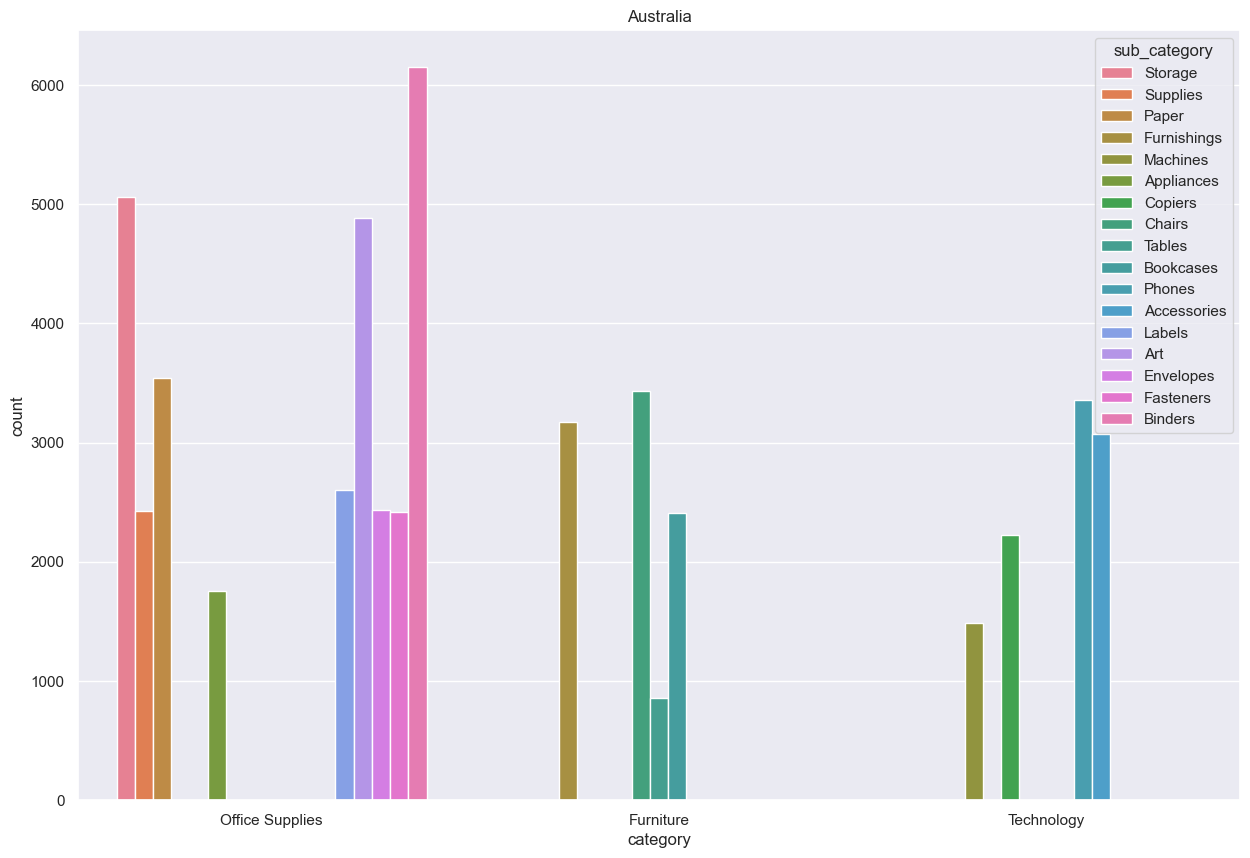

In [96]:
#2nd largest consumer country "Australia" 
plt.figure(figsize=(15,10))
plt.title("Australia")
sns.set_theme(style="darkgrid")
sns.countplot(x=df["category"],hue=df["sub_category"])

<Axes: title={'center': 'France'}, xlabel='category', ylabel='count'>

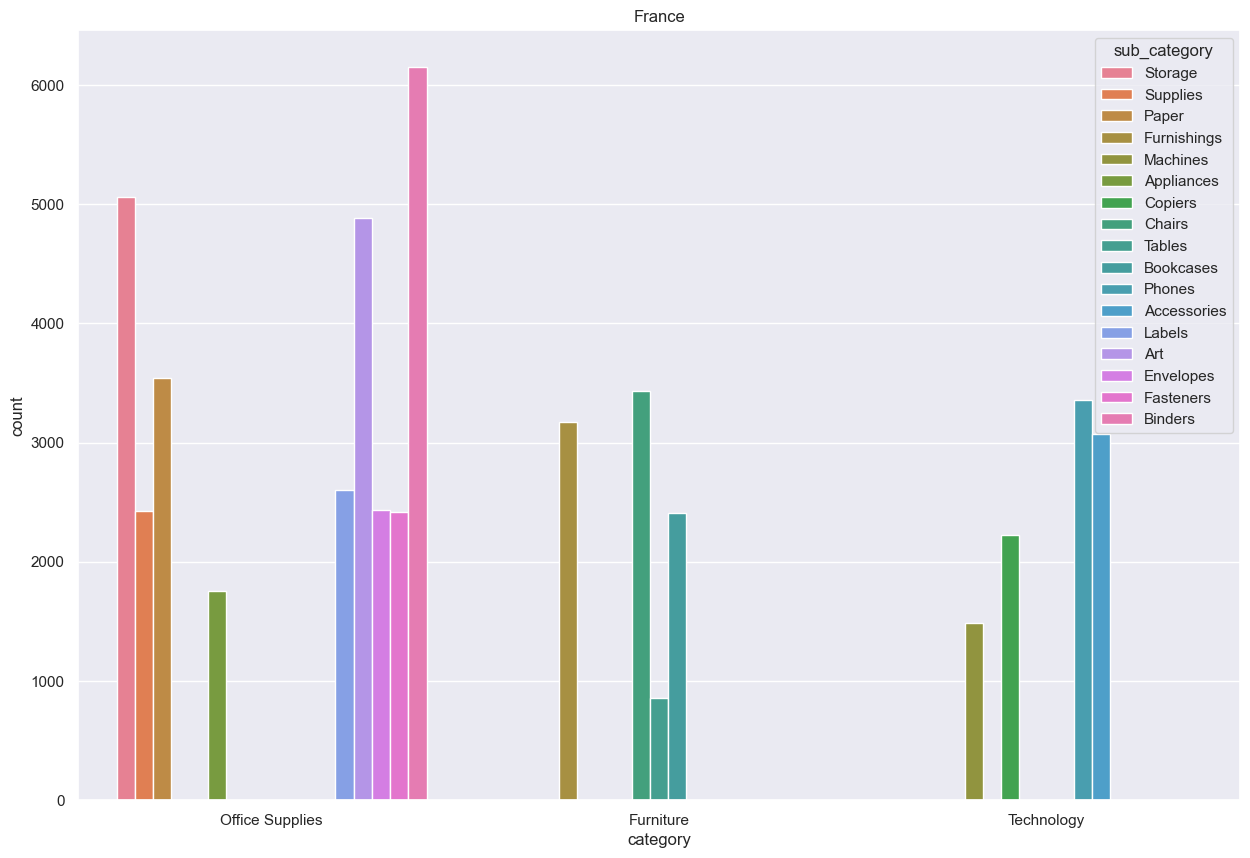

In [97]:
#3rd largest consumer country "France" 
plt.figure(figsize=(15,10))
plt.title("France")
sns.set_theme(style="darkgrid")
sns.countplot(x=df["category"],hue=df["sub_category"])

In all 3 Top countries United States, Australia and France Office Supplies is the highest selling Category and with the Binders as highest selling Sub-Category.

Q: Growth of Superstore Sales over the year 2011-2014?

In [98]:
df["year"].unique()

array([2011, 2012, 2013, 2014])

In [99]:
df["year"].value_counts()

year
2014    17531
2013    13799
2012    10962
2011     8998
Name: count, dtype: int64

In [100]:
df_1=df.sort_values(by=["year"],ascending=True)

In [101]:
df_2011=df_1[df_1["year"]==2011]
df_2011["quantity"].sum()

np.int64(31443)

In [102]:
df_2012=df_1[df_1["year"]==2012]
df_2012["quantity"].sum()

np.int64(38111)

In [103]:
df_2013=df_1[df_1["year"]==2013]
df_2013["quantity"].sum()

np.int64(48136)

In [104]:
df_2014=df_1[df_1["year"]==2014]
df_2014["quantity"].sum()

np.int64(60622)

Text(0.5, 1.0, 'Growth of the Store')

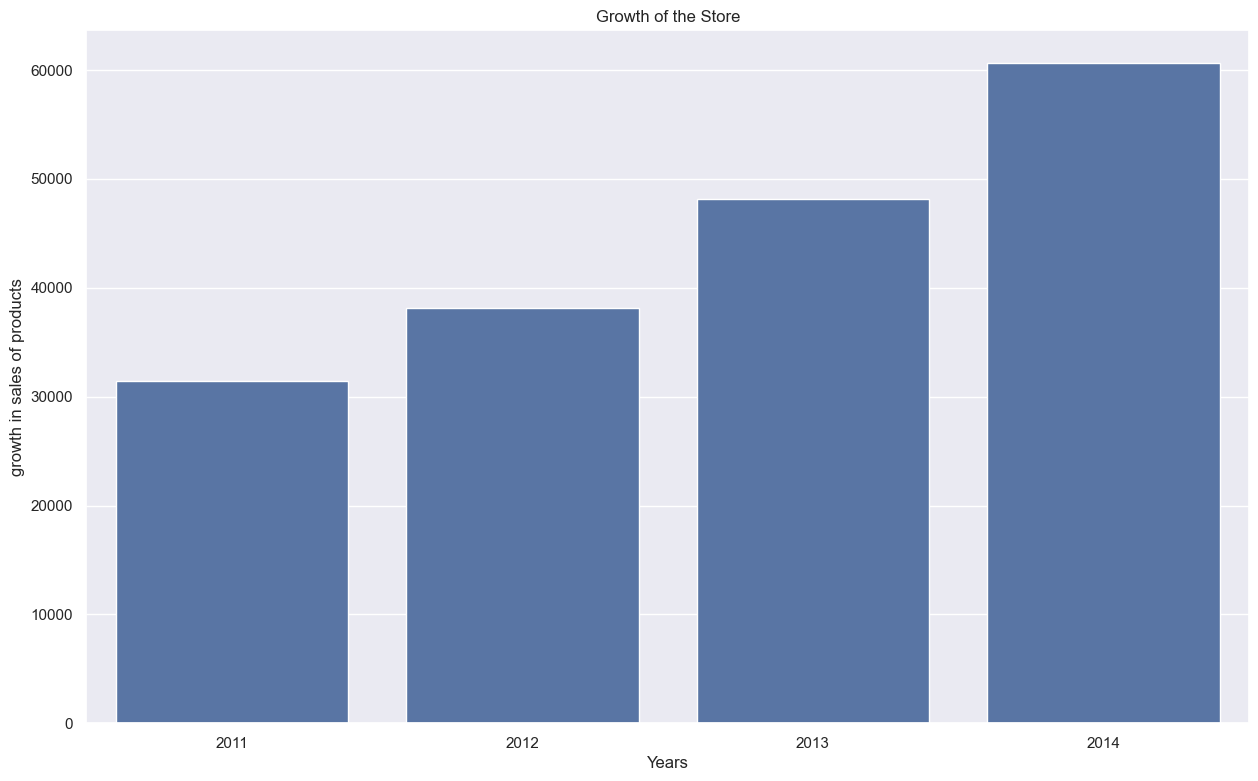

In [105]:
S1=[2011,2012,2013,2014]
S2=[31443,38111,48136,60622]
sns.barplot(x=S1,y=S2)
plt.xlabel("Years")
plt.ylabel("growth in sales of products")
plt.title("Growth of the Store")

The Sales of the store has increased each year.

Analyzing Profit

Q(a) Anazlyzing Profit by each Category

In [106]:
df["category"].unique()

array(['Office Supplies', 'Furniture', 'Technology'], dtype=object)

Text(0, 0.5, 'In millions')

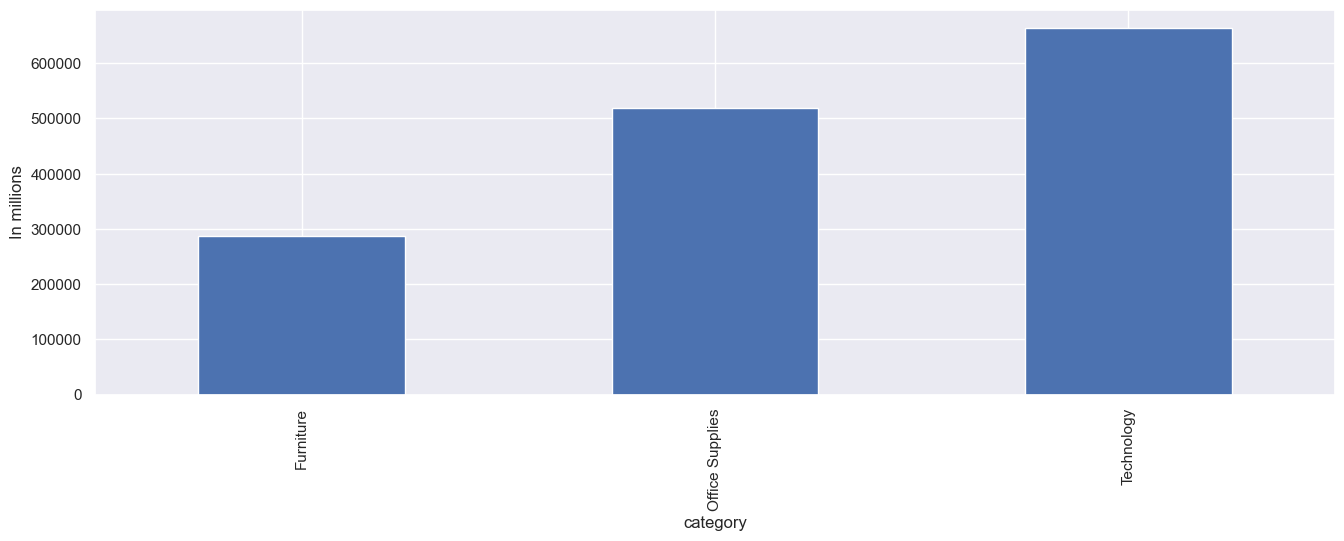

In [107]:
categorical_profits = df.groupby('category')['profit'].sum()
categorical_profits.plot(kind='bar', figsize=(16,5))
plt.ylabel("In millions")


Technology is the most Profitable Category

Q(b) Analyzing Profit from each Market in the World

Text(0, 0.5, 'In millions')

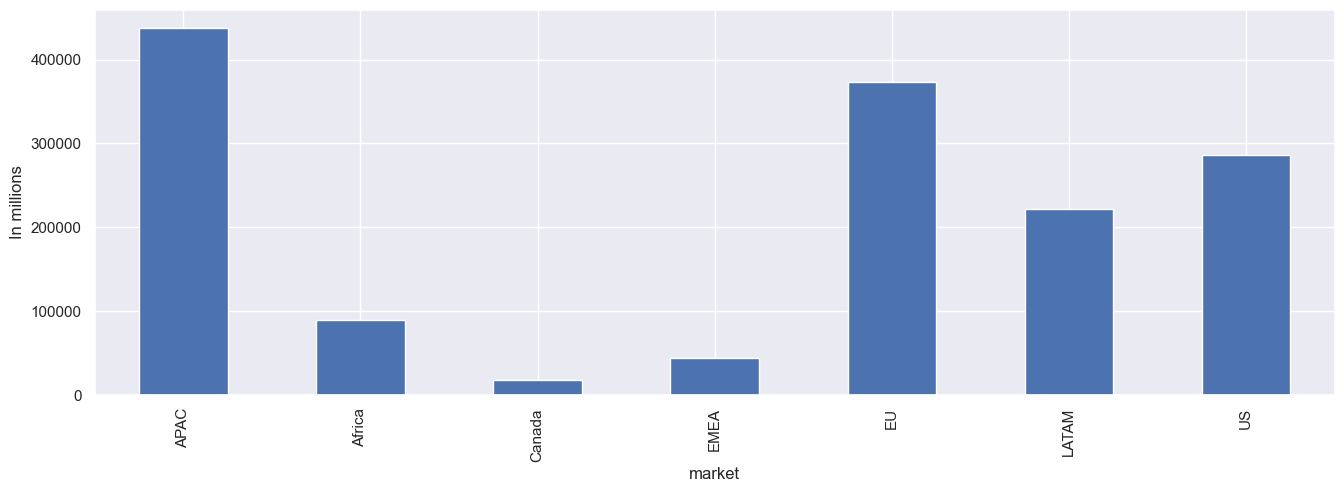

In [108]:
market_profits = df.groupby('market')['profit'].sum()
market_profits.plot(kind='bar',figsize=(16,5))
plt.ylabel("In millions")

From above Visual we can conclude that most of Profit is coming from APAC market followed by EU, US and LATAM markets

Q(c) Top 5 Profitable Countries?

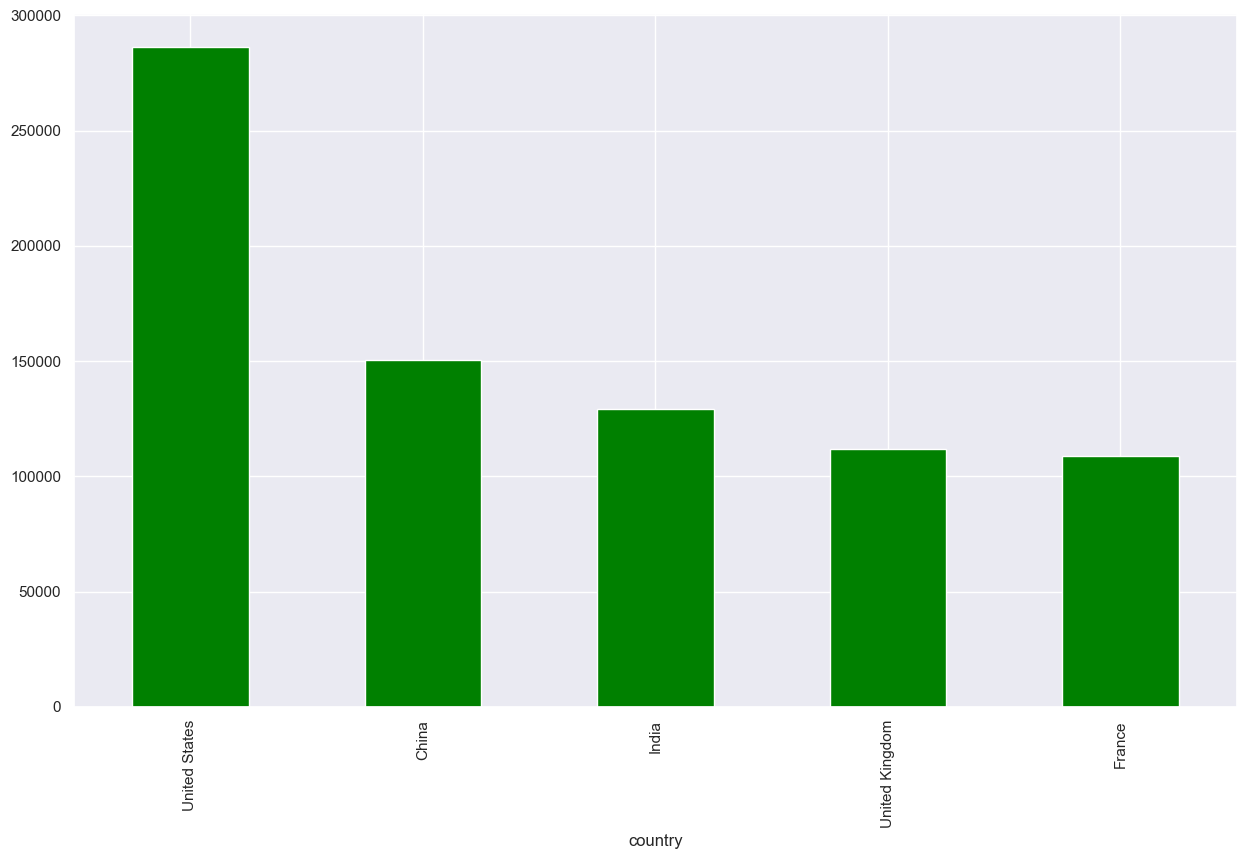

In [109]:
df.groupby('country')['profit'].sum().sort_values(ascending=False).head(5).plot.bar(color="green")
plt.show()

The United States, China, India, United Kingdom and France are the Top 5 Profitable Countries.

Q: What are the top 10 most selling Products

In [110]:
top_sp=pd.DataFrame(df.groupby('product_name')['quantity'].sum())
top_sp.sort_values('quantity',ascending=False)[:10]

,quantity
product_name,
Staples,876
"Cardinal Index Tab, Clear",337
"Eldon File Cart, Single Width",321
"Rogers File Cart, Single Width",262
"Sanford Pencil Sharpener, Water Color",259
"Stockwell Paper Clips, Assorted Sizes",253
"Avery Index Tab, Clear",252
"Ibico Index Tab, Clear",251
"Smead File Cart, Single Width",250


C:\Users\sachi\AppData\Local\Temp\ipykernel_31460\423571353.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='product_name', data=df, order=df['product_name'].value_counts().head(10).index, palette='viridis')


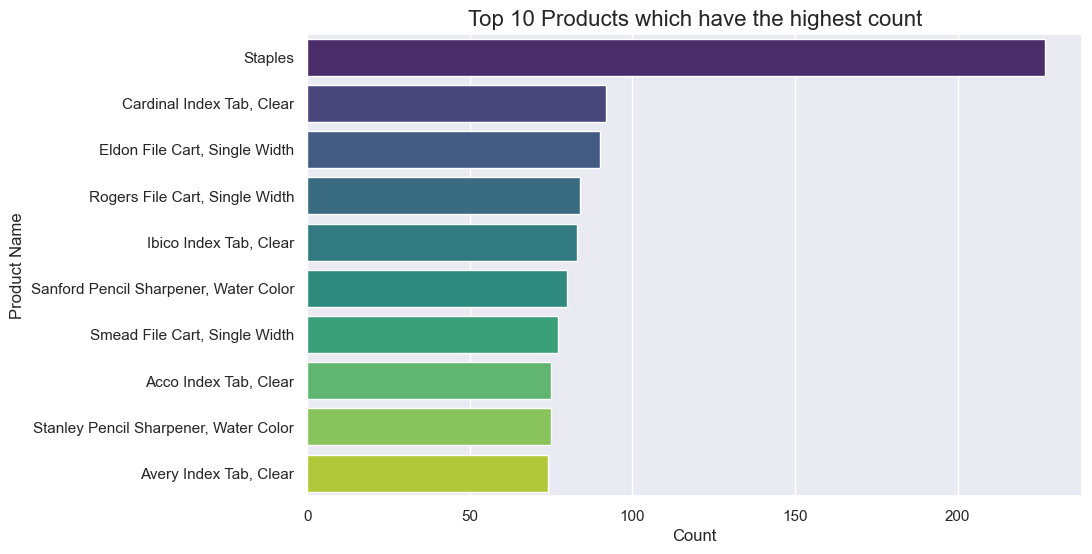

In [111]:
plt.figure(figsize=(10, 6))
sns.countplot(y='product_name', data=df, order=df['product_name'].value_counts().head(10).index, palette='viridis')
plt.title('Top 10 Products which have the highest count', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Product Name', fontsize=12)
plt.show()


Q: What is the most preferred Shipment Mode?

In [112]:
df['ship_mode'].value_counts()

ship_mode
Standard Class    30775
Second Class      10309
First Class        7505
Same Day           2701
Name: count, dtype: int64

<Axes: ylabel='count'>

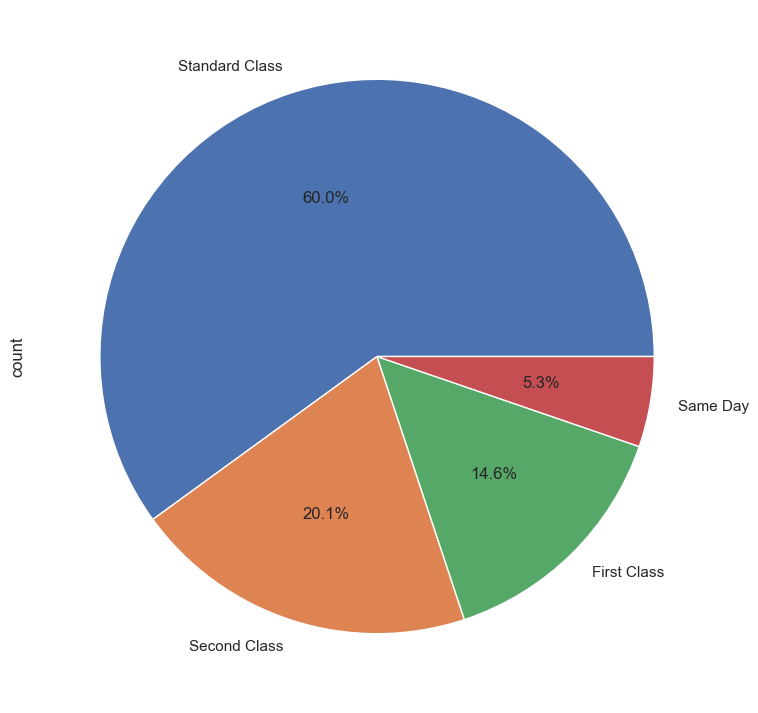

In [113]:
df['ship_mode'].value_counts().plot.pie(autopct='%1.1f%%')

Q: In which Region the store is giving more discount and what is the most profitable region?

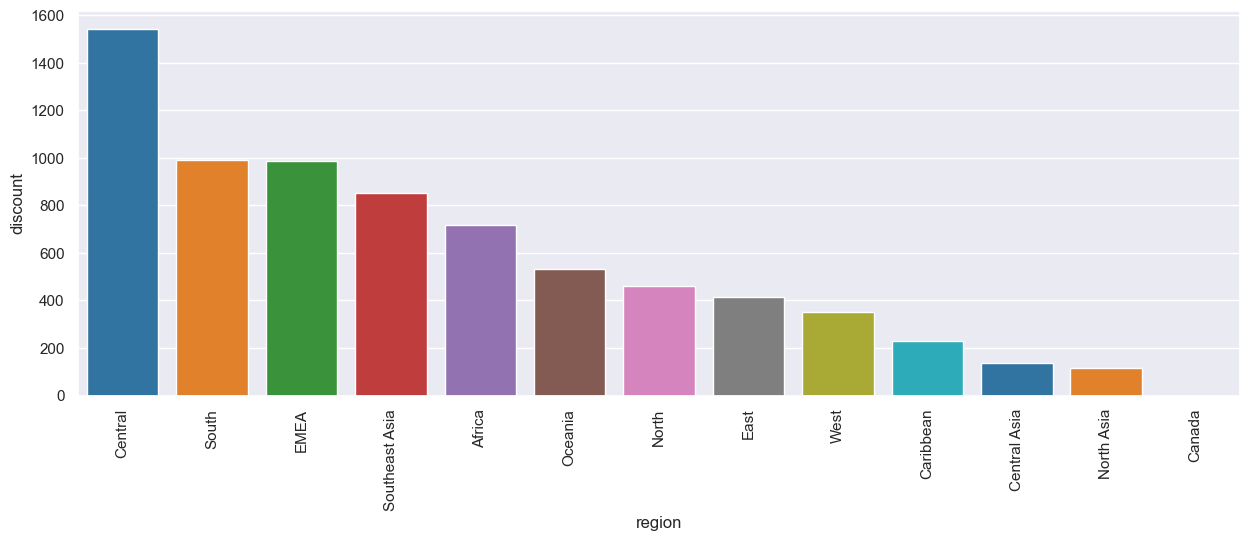

In [114]:
regions= df.groupby('region')['discount'].sum().sort_values(ascending=False).reset_index()
ax = plt.subplots(figsize=(15, 5))
sns.barplot(x='region', y='discount', data=regions,hue='region',palette=sns.color_palette("tab10", len(regions)),legend=False)
plt.xticks(rotation=90)
plt.show()

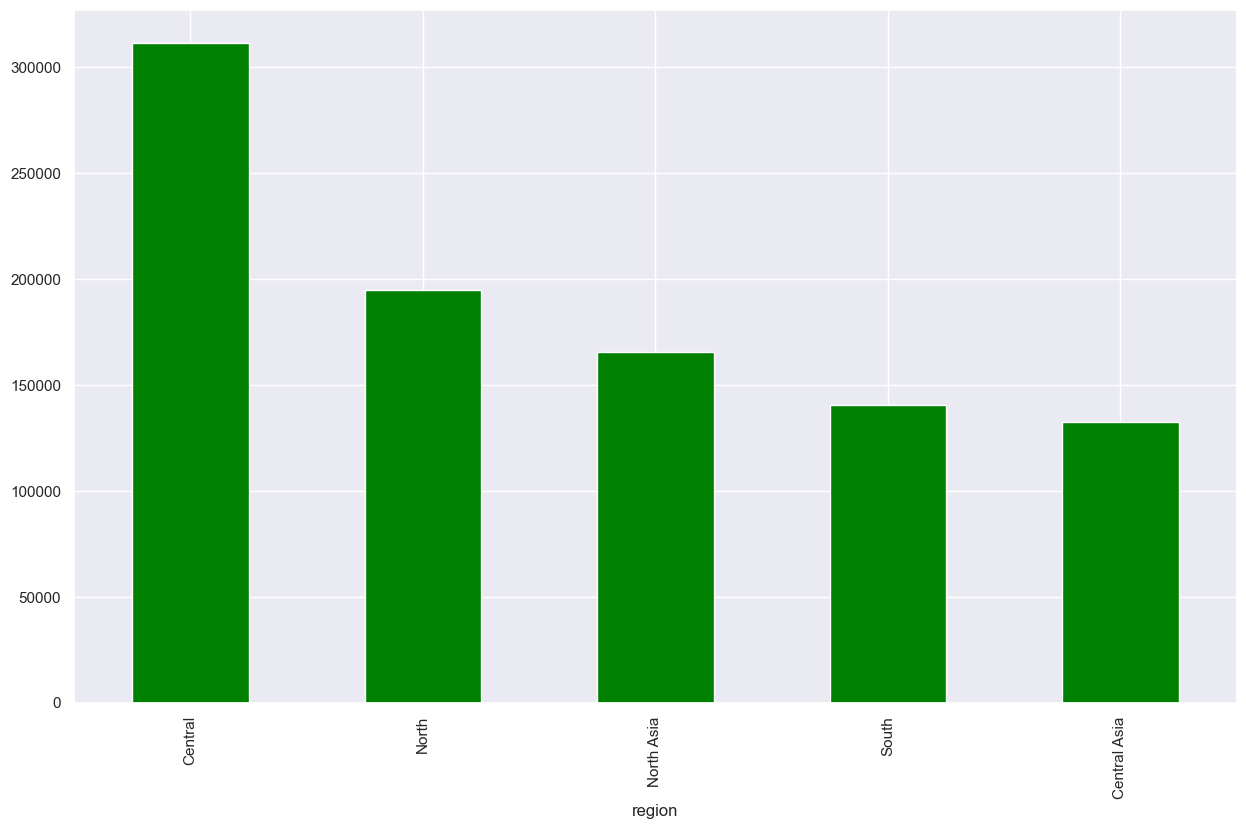

In [115]:
df.groupby('region')['profit'].sum().sort_values(ascending=False).nlargest(n=5).plot.bar(color="green")
plt.show()

Super Store is offering high discounts in the Central Region and despite that, the Central region is still the most profitable Region.

Q: Creating only Profit/Loss Dataframe to calculate Total Profit & Loss of the superstore from 2011-2014 and the Net Profit

In [116]:
df_profit=df[df['profit'] > 0]

In [117]:
df_loss=df[df['profit'] < 0]

In [118]:
#Shape of the profit Dataframe
df_profit.shape

(38079, 21)

In [119]:
#Shape of the loss Dataframe
df_loss.shape

(12543, 21)

Total Profit?

In [120]:
Total_Profit = df_profit['profit'].sum()
print(Total_Profit)

2389392.212


Total Loss??

In [121]:
Total_loss=np.negative(df_loss['profit'].sum())
print("Total_loss = %.2f" %Total_loss)

Total_loss = 920357.39


Net Profit??

In [122]:
Net_Profit = Total_Profit - Total_loss
print(Net_Profit)

1469034.8212799998


In [123]:
df_Net_Profit=pd.DataFrame({'Total_Profit': {0: 2389392},
                            'Total_loss':{0: 920357},
                            '         ':{0: '='},
                            'Net_Profit':{0: 1469035}})

In [124]:
df_Net_Profit

,Total_Profit,Total_loss,,Net_Profit
0,2389392,920357,=,1469035
